<a href="https://colab.research.google.com/github/njanrepo/MLEProject/blob/main/ML_Proj_stock_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

# New Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
!pip install yfinance scikit-learn statsmodels seaborn

     |████████████████████████████████| 6.3 MB 40.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=6337be5dfd65a865c11112157a64893e403bd6fff01f3c2f1d3fc31b608933fd
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf

In [4]:
def get_sp500_list():
  payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  first_table = payload[0]
  sp500df = first_table
  sp500_list = sp500df.Symbol.values.tolist()
  return sp500_list

In [5]:
df=yf.download(tickers=get_sp500_list(), period='1d')

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [6]:
symbol='^GSPC'
df= yf.download(symbol, start='2021-01-01', end='2021-11-10')

[*********************100%***********************]  1 of 1 completed


In [7]:
df.shape

(216, 6)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,216.000000,216.000000,216.000000,216.000000,216.000000,2.160000e+02
mean,4204.341942,4224.122088,4185.351804,4206.955968,4206.955968,3.933196e+09
std,253.592453,250.523130,257.434445,254.262488,254.262488,1.165391e+09
min,3698.020020,3737.830078,3662.709961,3700.649902,3700.649902,2.371630e+09
25%,3942.122498,3969.217590,3921.935059,3954.747559,3954.747559,3.087422e+09
50%,4222.489990,4235.255127,4203.010010,4224.245117,4224.245117,3.602580e+09
75%,4407.359863,4425.282471,4391.634888,4413.630005,4413.630005,4.580242e+09
max,4707.250000,4718.500000,4694.390137,4701.700195,4701.700195,9.878040e+09


In [9]:
df.nunique()

Open         214
High         215
Low          216
Close        216
Adj Close    216
Volume       216
dtype: int64

In [10]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [12]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [13]:
df.head()

,open,high,low,close,adj_close,volume
Date,,,,,,
2021-01-04,3764.610107,3769.989990,3662.709961,3700.649902,3700.649902,5006680000
2021-01-05,3698.020020,3737.830078,3695.070068,3726.860107,3726.860107,4582620000
2021-01-06,3712.199951,3783.040039,3705.340088,3748.139893,3748.139893,6049970000
2021-01-07,3764.709961,3811.550049,3764.709961,3803.790039,3803.790039,5080870000
2021-01-08,3815.050049,3826.689941,3783.600098,3824.679932,3824.679932,4764180000


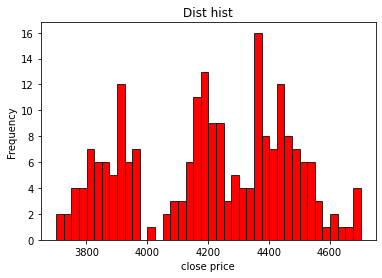

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(df.close, bins=40, color='red', alpha=1)
plt.ylabel("Frequency")
plt.xlabel('close price')
plt.title('Dist hist')
plt.show()

In [15]:
def make_X_and_Y(close_prices, period=6):
  X = []
  y = []
  for i in range(len(close_prices)- period):
    X.append(close_prices[i:i+period])
    y.append(close_prices[i+period])
  return X,y

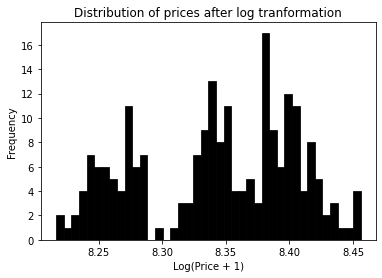

In [16]:
log_price = np.log1p(df.close)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15 , shuffle=False,random_state = 0)

In [29]:
print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))

178
32
178
32


AttributeError: ignored

In [17]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor


In [18]:
X,y=make_X_and_Y(list(df.close))

def return_model(X, y):
  clf = RandomForestRegressor()
  clf.fit(X,y)
  return clf
period = 6
print(np.array(list(df.close)[-period:]).reshape((1,-1)))
latest_feat = np.array(list(df.close)[-period:]).reshape((1,-1))
classifier = return_model(X,y)
tomorrow_prediction = classifier.predict(latest_feat)
print("Tomorrow Predicted value is : ", tomorrow_prediction[0])
print("Today's value is: ", df.close[-1])

[[4630.64990234 4660.56982422 4680.06005859 4697.52978516 4701.70019531
  4685.25      ]]
Tomorrow Predicted value is :  4689.799423828125
Today's value is:  4685.25


In [19]:
for i in range(len(df.close)- period):
  X = np.array(list(df.close)[i:i+period]).reshape((1,-1))
  actual = df.close[i+period]
  pred = classifier.predict(X)
  print (actual , pred)

3801.18994140625 [3807.76367432]
3809.840087890625 [3807.9209375]
3795.5400390625 [3812.28884277]
3768.25 [3782.43880859]
3798.909912109375 [3806.1596582]
3851.85009765625 [3833.27876221]
3853.070068359375 [3848.55895508]
3841.469970703125 [3837.26099854]
3855.360107421875 [3835.25377197]
3849.6201171875 [3836.50768555]
3750.77001953125 [3776.22212646]
3787.3798828125 [3780.4829248]
3714.239990234375 [3746.93918457]
3773.860107421875 [3790.59605225]
3826.31005859375 [3807.80263184]
3830.169921875 [3834.90316895]
3871.739990234375 [3861.48560059]
3886.830078125 [3875.4101709]
3915.590087890625 [3910.98777588]
3911.22998046875 [3914.40810303]
3909.8798828125 [3916.69733154]
3916.3798828125 [3918.97782959]
3934.830078125 [3929.26723633]
3932.590087890625 [3931.14116943]
3931.330078125 [3926.66824951]
3913.969970703125 [3919.10880127]
3906.7099609375 [3909.54717529]
3876.5 [3891.17080078]
3881.3701171875 [3885.80467041]
3925.429931640625 [3907.20758057]
3829.340087890625 [3866.5041748]
381

In [20]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [21]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [34]:
head = 10
X,y=make_X_and_Y(list(df.close))
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.15 , shuffle=False,random_state = 0)
for model in regressors[:head]:
    start = time()
    model.fit(train_x,train_y)
    train_time = time() - start
    start = time()
    y_pred = model.predict(test_x)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(test_y, y_pred))
    print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
    print("\tR2 score:", r2_score(test_y, y_pred))
    print()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
	Training time: 0.001s
	Prediction time: 0.001s
	Explained variance: 0.611332604543708
	Mean absolute error: 74.2163604736329
	R2 score: 0.45544072688682014

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start